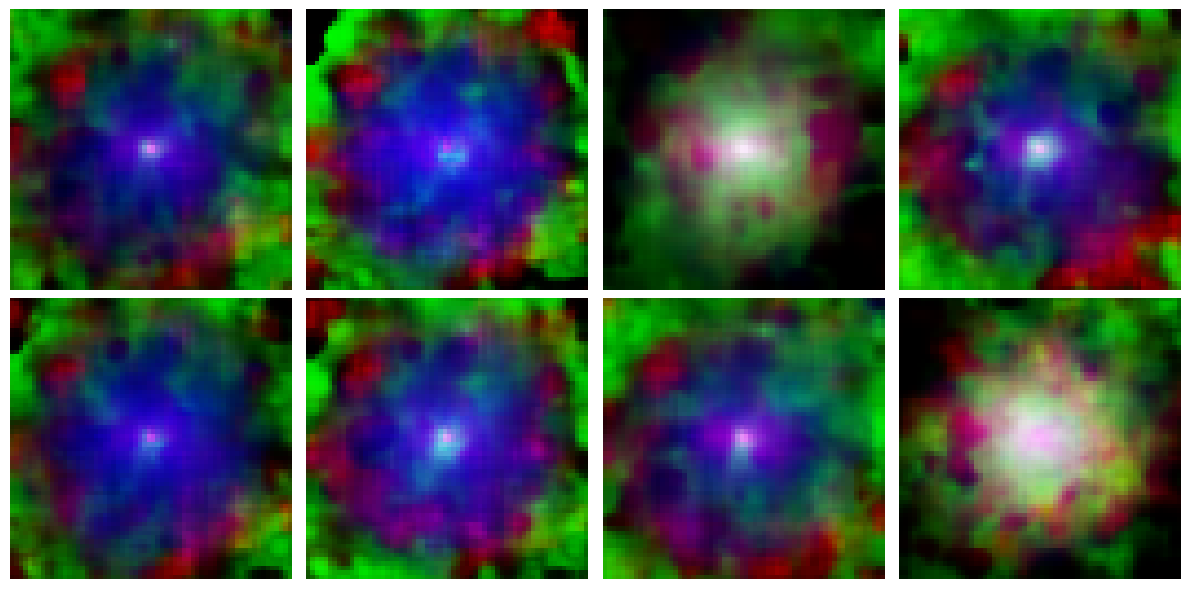

In [16]:
# example_usage.py
import torch
import matplotlib.pyplot as plt
from galaxy_gen.sampler import load_model, generate_galaxy_samples
import os
import galaxy_gen

# Path to your saved model checkpoint.
model_path = os.path.join(os.path.dirname(galaxy_gen.__file__), 'models/galaxy_model.pth')
device = 'cpu'  # or 'cuda' if you have a GPU

# Load the model.
model = load_model("galaxy",model_path, device=device)

# Generate random samples.
samples = generate_galaxy_samples(model)

fig, axes = plt.subplots(2, 4, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(samples[i].permute(1, 2, 0))  # Change (C, H, W) → (H, W, C)
    ax.axis("off")  # Hide axes
    if i>7:
        break
plt.tight_layout()
plt.show()

torch.Size([11727, 1, 64, 64])


c:\Users\ilasy\btechproject\galaxy_gen\galaxy_gen\sampler.py:250: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  dataset = TensorDataset(torch.tensor(data))


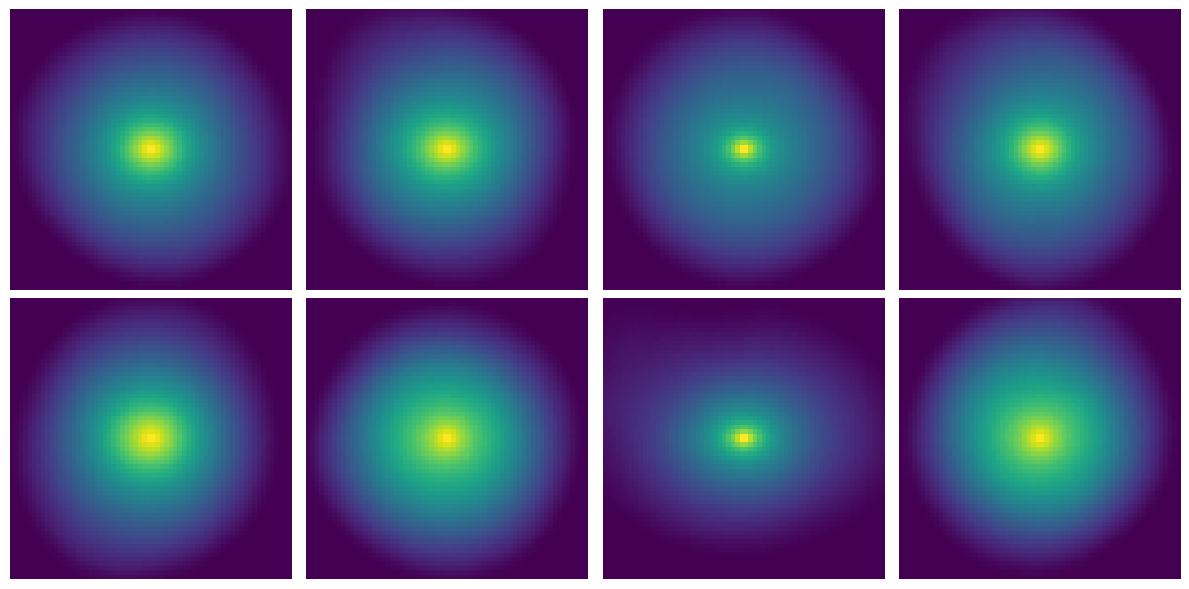

In [1]:
# example_usage.py
import torch
import matplotlib.pyplot as plt
from galaxy_gen.sampler import load_model, generate_masses_samples
import os
import galaxy_gen

# Path to your saved model checkpoint.
model_path = os.path.join(os.path.dirname(galaxy_gen.__file__), 'models/mass_model.pth')
device = 'cpu'  # or 'cuda' if you have a GPU

# Load the model.
model = load_model("masses",model_path, device=device)

# Generate random samples.
samples = generate_masses_samples(model)

fig, axes = plt.subplots(2, 4, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(samples[i].permute(1, 2, 0))  # Change (C, H, W) → (H, W, C)
    ax.axis("off")  # Hide axes
    if i>7:
        break
plt.tight_layout()
plt.show()

In [5]:
data_path="./galaxy_gen/data/galaxy_data.pkl"
import pickle
# if not os.path.exists(data_path):
#     data_path = os.path.join(os.path.dirname(__file__), data_path)
# Load data from pickle file
with open(data_path, 'rb') as f:
    data = pickle.load(f)
data.shape

torch.Size([11727, 3, 64, 64])

In [6]:

# Create DataLoader
x_train_2d = torch.tensor(data).float()
train_loader = torch.utils.data.DataLoader(x_train_2d, batch_size=128, shuffle=True)

C:\Users\ilasy\AppData\Local\Temp\ipykernel_23512\1731162797.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_train_2d = torch.tensor(data).float()


In [9]:
import pickle
data_path=r"C:\Users\ilasy\btechproject\galaxy_gen\galaxy_gen\data\galaxy_data.pkl"
with open(data_path, 'rb') as f:
    data = pickle.load(f)

In [10]:
data.shape

torch.Size([100, 3, 64, 64])

In [8]:
with open(data_path, 'wb') as f:
    pickle.dump(data[:100], f)